In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Downloads\archive (3)\Twitter_Data.csv")
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


clean_text    4
category      7
dtype: int64

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (3)\Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['category'] = df['category'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [2]:
import re

def clean_tweet(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"@\w+", "", text)          # remove mentions
    text = re.sub(r"#\w+", "", text)          # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # remove special characters
    text = re.sub(r"\s+", " ", text)          # remove extra spaces
    text = text.strip()
    return text

In [7]:
df['clean_text'] = df['clean_text'].apply(clean_tweet)

In [8]:
df.head()

,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
df['text_length'] = df['clean_text'].apply(len)

In [11]:
df = df[df['text_length'] > 5]

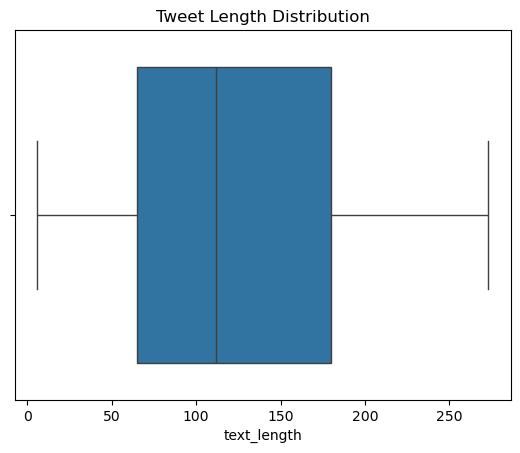

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['text_length'])
plt.title("Tweet Length Distribution")
plt.show()


In [14]:
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['text_length'] >= Q1 - 1.5*IQR) &
        (df['text_length'] <= Q3 + 1.5*IQR)]


In [15]:
df.shape

(162831, 3)

In [16]:
df['category'].value_counts()

category
 1.0    72225
 0.0    55094
-1.0    35505
Name: count, dtype: int64